In [1]:
from data_treat.get_ready_data import get_data, get_data_for_analiz
import pandas as pd
import matplotlib.pyplot as plt
from data_treat.data_normalizer import CustomNormalizer

In [2]:
COLUMNS = ["distance_from_home","distance_from_last_transaction","ratio_to_median_purchase_price",
           "repeat_retailer","used_chip","used_pin_number","online_order","fraud"]

In [3]:
data = get_data_for_analiz()


In [11]:
data = get_data()

In [4]:
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
distance_from_home,1000000.0,26.628792,65.390784,0.004874,3.878008,9.967760,25.743985,10632.723672
distance_from_last_transaction,1000000.0,5.036519,25.843093,0.000118,0.296671,0.998650,3.355748,11851.104565
ratio_to_median_purchase_price,1000000.0,1.824182,2.799589,0.004399,0.475673,0.997717,2.096370,267.802942
repeat_retailer,1000000.0,0.881536,0.323157,0.000000,1.000000,1.000000,1.000000,1.000000
used_chip,1000000.0,0.350399,0.477095,0.000000,0.000000,0.000000,1.000000,1.000000
used_pin_number,1000000.0,0.100608,0.300809,0.000000,0.000000,0.000000,0.000000,1.000000
online_order,1000000.0,0.650552,0.476796,0.000000,0.000000,1.000000,1.000000,1.000000
fraud,1000000.0,0.087403,0.282425,0.000000,0.000000,0.000000,0.000000,1.000000


In [14]:
data[data["fraud"] == 1].describe().T

,count,mean,std,min,25%,50%,75%,max
distance_from_home,87403.0,66.261876,134.391608,0.025847,4.585729,15.454219,101.110104,10632.723672
distance_from_last_transaction,87403.0,12.712185,47.997697,0.000407,0.328199,1.157631,4.598504,2160.499922
ratio_to_median_purchase_price,87403.0,6.006323,5.564320,0.011966,3.500270,5.071294,7.331222,266.689692
repeat_retailer,87403.0,0.880119,0.324825,0.000000,1.000000,1.000000,1.000000,1.000000
used_chip,87403.0,0.256399,0.436647,0.000000,0.000000,0.000000,1.000000,1.000000
used_pin_number,87403.0,0.003123,0.055801,0.000000,0.000000,0.000000,0.000000,1.000000
online_order,87403.0,0.946318,0.225391,0.000000,1.000000,1.000000,1.000000,1.000000
fraud,87403.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
data[data["fraud"] == 0].describe().T

,count,mean,std,min,25%,50%,75%,max
distance_from_home,912597.0,22.832976,52.828655,0.004874,3.828942,9.673847,24.158057,8777.136420
distance_from_last_transaction,912597.0,4.301391,22.472359,0.000118,0.293859,0.985074,3.268578,11851.104565
ratio_to_median_purchase_price,912597.0,1.423642,1.946152,0.004399,0.449768,0.913950,1.788918,267.802942
repeat_retailer,912597.0,0.881672,0.322997,0.000000,1.000000,1.000000,1.000000,1.000000
used_chip,912597.0,0.359402,0.479825,0.000000,0.000000,0.000000,1.000000,1.000000
used_pin_number,912597.0,0.109944,0.312821,0.000000,0.000000,0.000000,0.000000,1.000000
online_order,912597.0,0.622225,0.484831,0.000000,0.000000,1.000000,1.000000,1.000000
fraud,912597.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [7]:
Normilized_data = pd.DataFrame(CustomNormalizer.normalize(data),columns=COLUMNS)

In [8]:
Normilized_data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,0.005443,0.000026,0.007250,1.0,1.0,0.0,0.0,0.0
1,0.001018,0.000015,0.004816,1.0,0.0,0.0,0.0,0.0
2,0.000478,0.000068,0.001581,1.0,0.0,0.0,1.0,0.0
3,0.000211,0.000473,0.001338,1.0,1.0,0.0,1.0,0.0
4,0.004156,0.000048,0.008284,1.0,1.0,0.0,1.0,0.0


In [9]:
Normilized_data.describe().T

,count,mean,std,min,25%,50%,75%,max
distance_from_home,1000000.0,0.002504,0.006150,0.0,0.000364,0.000937,0.002421,1.0
distance_from_last_transaction,1000000.0,0.000425,0.002181,0.0,0.000025,0.000084,0.000283,1.0
ratio_to_median_purchase_price,1000000.0,0.006795,0.010454,0.0,0.001760,0.003709,0.007812,1.0
repeat_retailer,1000000.0,0.881536,0.323157,0.0,1.000000,1.000000,1.000000,1.0
used_chip,1000000.0,0.350399,0.477095,0.0,0.000000,0.000000,1.000000,1.0
used_pin_number,1000000.0,0.100608,0.300809,0.0,0.000000,0.000000,0.000000,1.0
online_order,1000000.0,0.650552,0.476796,0.0,0.000000,1.000000,1.000000,1.0
fraud,1000000.0,0.087403,0.282425,0.0,0.000000,0.000000,0.000000,1.0


<AxesSubplot:>

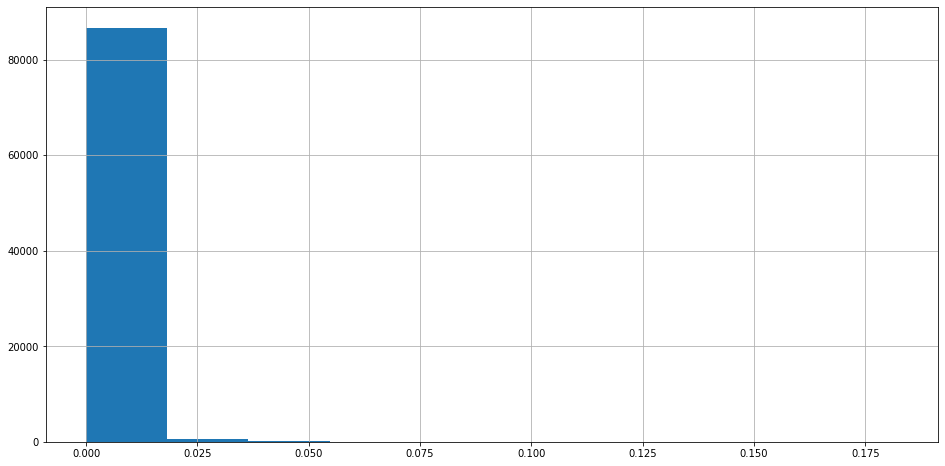

In [10]:
Normilized_data[Normilized_data["fraud"] == 1]["distance_from_last_transaction"].hist(figsize=(16, 8))

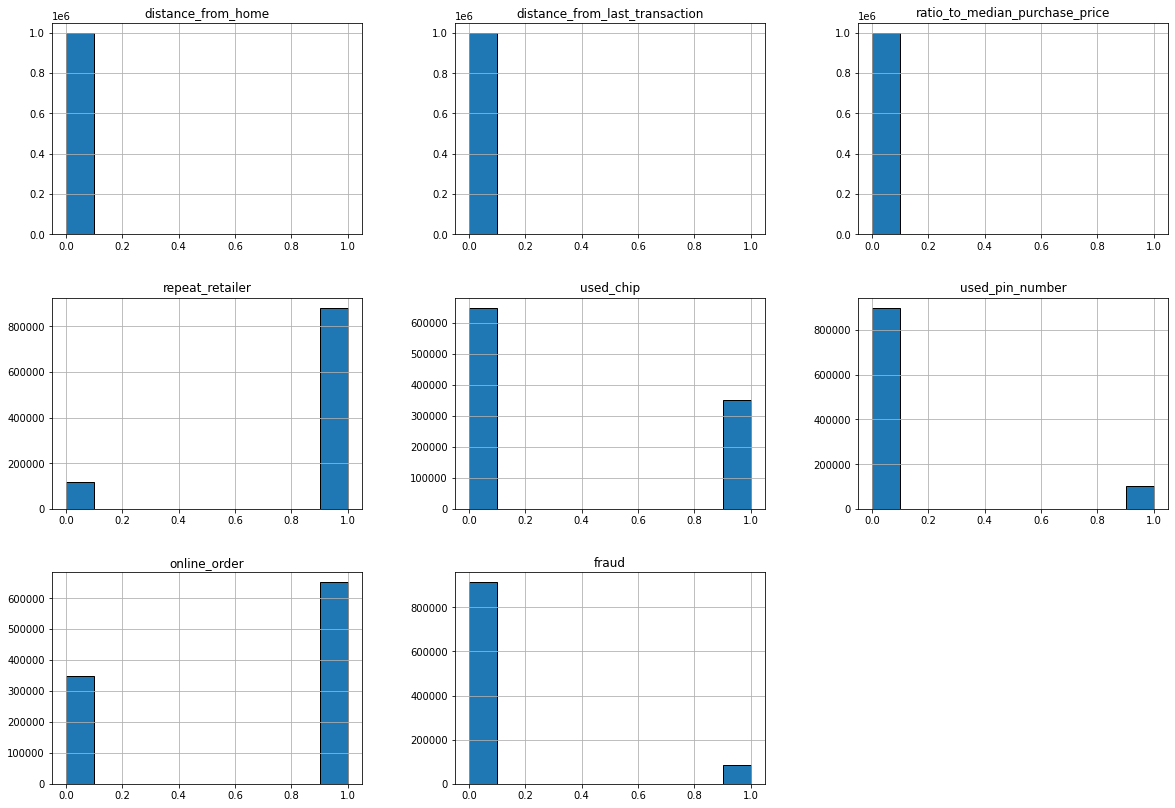

In [12]:
Normilized_data.hist(figsize=(20,14), edgecolor="black")
plt.show()